In [1]:
# FSM Control App IO Check - Command SHMIM at various frequencies and verify that fsmCtrl app logs all commands
# Use python notebook to write shmim and use fsmCtrl logs to check outputs
# Use telem_fsm to verify shmim.

# Based on test_square_wave.ipynb

import numpy as np
import astropy.units as u
import time
from datetime import datetime
today = datetime.today().strftime('%Y%m%d')
import copy
from importlib import reload
import matplotlib.pyplot as plt
import multiprocessing
from IPython.display import clear_output, display
import subprocess
import glob
from pathlib import Path
import os

import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
import telem
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

wavelength = 633e-9
fl = 450e-3
fsm_pupil_diam = 7.1e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

lamD_per_pix = 3.45e-6 / (fl * wavelength/fsm_pupil_diam) # lamD per pixel
print(lamD_per_pix)

as_per_pix = lamD_per_pix * as_per_lamD
print(as_per_pix)

v_zero = np.array([[0,0,0]]).T
v_bias = np.array([[50,50,50]]).T



18.389524275269295 arcsec
0.08599262769878883
1.581363514561072 arcsec


In [2]:

cam = cam_utils.CAM('campupil')
npsf = 256
cam.set_roi(575, 900, npsf, client0)
cam.set_exptime(0.0001, client0)

# Setup FSM Interface
fsm_bias_channel = ImageStream('dm00disp00')
fsm_channel = ImageStream('dm00disp10')
fsm_bias_channel.write(v_bias)
fsm_channel.write(v_zero)
amp = 100*u.arcsec


200
Saved data to:  /opt/MagAOX/calib/dm/fsm/fsm_sine_cube.fits
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Ended tmux session for fsmSineMod
Session fsmSineMod does not exist
Created tmux session for fsmSineMod
Executed in fsmSineMod session: '/opt/MagAOX/bin/dmModulator -n fsmSineMod'


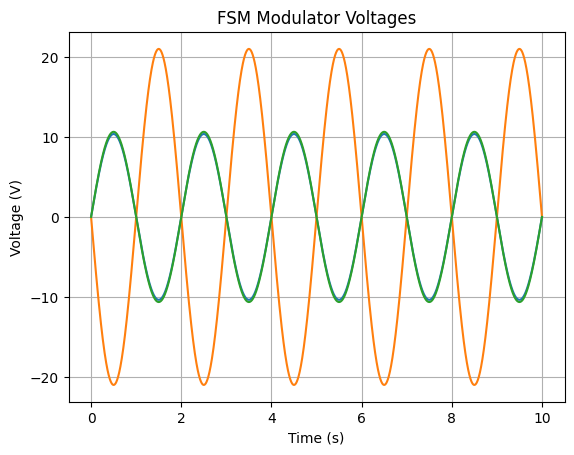

File '/opt/MagAOX/rawimages/campupil/campupil_20250221175541361266542.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175533381698672.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175538701429545.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175536041525329.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175540474660033.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175522567409301.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175535154935984.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175524515531663.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175530721851892.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250221175522742237262.xrif' removed successfully.
File '/opt/MagAOX/ra

0
/opt/MagAOX/logs/fsmCtrl_20250224111859060692486.binlog


/home/nicklambert/data/20250224_200
500
Saved data to:  /opt/MagAOX/calib/dm/fsm/fsm_sine_cube.fits
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Ended tmux session for fsmSineMod
Session fsmSineMod does not exist
Created tmux session for fsmSineMod
Executed in fsmSineMod session: '/opt/MagAOX/bin/dmModulator -n fsmSineMod'


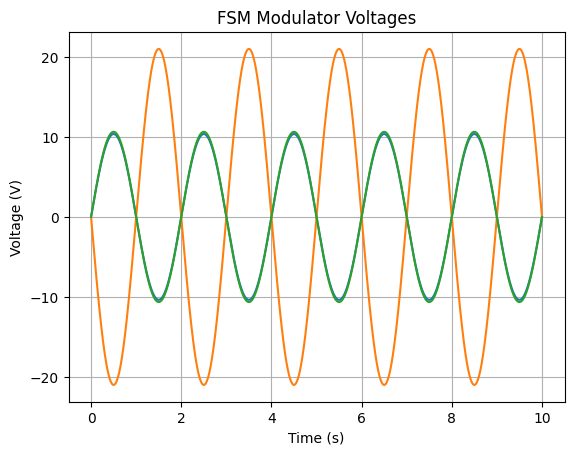

File '/opt/MagAOX/rawimages/campupil/campupil_20250224172555686000080.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172550366307763.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172601005731589.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172607211957038.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172608985186190.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172558345868145.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172549846797420.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172609871842987.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172600119059977.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172553912745889.xrif' removed successfully.
File '/opt/MagAOX/ra

0
/opt/MagAOX/logs/fsmCtrl_20250224111859060692486.binlog


/home/nicklambert/data/20250224_500
1000
Saved data to:  /opt/MagAOX/calib/dm/fsm/fsm_sine_cube.fits
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Ended tmux session for fsmSineMod
Session fsmSineMod does not exist
Created tmux session for fsmSineMod
Executed in fsmSineMod session: '/opt/MagAOX/bin/dmModulator -n fsmSineMod'


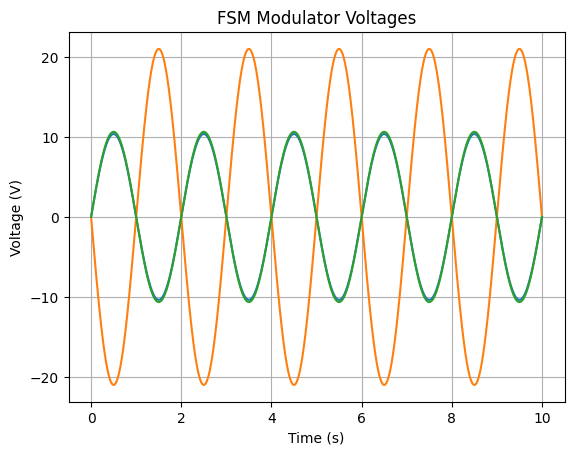

File '/opt/MagAOX/rawimages/campupil/campupil_20250224172629377393445.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172640903359293.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172637356815422.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172621915582464.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172624944234549.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172622284391788.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172624057679665.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172634697044248.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172628490728177.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172635583637381.xrif' removed successfully.
File '/opt/MagAOX/ra

0
/opt/MagAOX/logs/fsmCtrl_20250224111859060692486.binlog


/home/nicklambert/data/20250224_1000
2000
Saved data to:  /opt/MagAOX/calib/dm/fsm/fsm_sine_cube.fits
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Waiting for tmux session for fsmSineMod to exit...
Ended tmux session for fsmSineMod
Session fsmSineMod does not exist
Created tmux session for fsmSineMod
Executed in fsmSineMod session: '/opt/MagAOX/bin/dmModulator -n fsmSineMod'


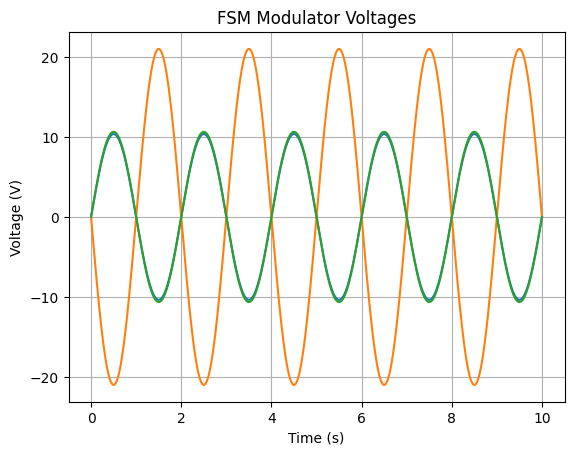

File '/opt/MagAOX/rawimages/campupil/campupil_20250224172710161617032.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172713708072128.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172707501760467.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172703955277726.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172658635644504.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172701295476939.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172655089136914.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172655975817804.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172705728523885.xrif' removed successfully.
File '/opt/MagAOX/rawimages/campupil/campupil_20250224172706615134754.xrif' removed successfully.
File '/opt/MagAOX/ra

0
/opt/MagAOX/logs/fsmCtrl_20250224111859060692486.binlog


/home/nicklambert/data/20250224_2000


In [ ]:

#freqs = np.array([200]) # Hz
freqs = np.array([200, 500, 1000, 2000]) # Hz
#freq = 200 # Hz
sineFreq = 0.5 # Hz
tMax = 5/sineFreq #10 #s
    
for freq in freqs:
    print(freq)
    period = (1/freq) #s
    nSamps = int(tMax*freq)
    #print(nSamps)
    volt_commands = np.zeros((nSamps,3,1))
    t = np.linspace(0,tMax,nSamps)
    wave = amp * np.sin(2*np.pi*t*sineFreq)
    for i in range(nSamps):
        volt_commands[i] = fsm_utils.get_fsm_volts(tip=wave[i], tilt=0*u.arcsec)
    utils.save_fits('/opt/MagAOX/calib/dm/fsm/fsm_sine_cube.fits', volt_commands[:-1])
    subprocess.run(['xctrl', 'stop', 'fsmSineMod'])
    subprocess.run(['xctrl', 'start', 'fsmSineMod'])
    writeTimes = np.zeros((nSamps))
    plt.subplot(111)
    plt.title('FSM Modulator Voltages')
    plt.plot(t,volt_commands[:,0])
    plt.plot(t,volt_commands[:,1])
    plt.plot(t,volt_commands[:,2])
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.grid()
    plt.show()
    #tElapsed = 0 #ns
    #clk_id = time.CLOCK_REALTIME # no time.CLOCK_TAI?
    #n = 0
    #nextTime = 0
    #fsm_bias_channel.write(v_bias)
    #while n < nSamps:
    #    if n == 0: tStart = time.perf_counter() #clock_gettime_ns(clk_id)
    #    fsm_channel.write(volt_commands[n])
    #    writeTimes[n] = time.perf_counter()
    #    n+=1
    #    nextTime = (n*period)+tStart
    #    time.sleep(max(nextTime-(time.perf_counter())-0.0001,0.0))
    #print(np.diff(writeTimes))
    #print(n)
    #print(period)
    #print(np.std(np.diff(writeTimes)))
    #plt.subplot(111)
    #plt.plot((np.diff(writeTimes)))
    #plt.ylabel('Timing Error (%)')
    #plt.grid()
    #plt.show()  
    # remove raw images files
    files_to_remove = glob.glob("/opt/MagAOX/rawimages/campupil/*") # Gets a list of all files and directories in the current directory
    for file_path in files_to_remove:
        if os.path.isfile(file_path): # Checks if it's a file
            os.remove(file_path)
            print(f"File '{file_path}' removed successfully.")
        else:
            print(f"'{file_path}' is not a file. Skipping.")
    files_to_remove = glob.glob("/opt/MagAOX/rawimages/fsm/*") # Gets a list of all files and directories in the current directory
    for file_path in files_to_remove:
        if os.path.isfile(file_path): # Checks if it's a file
            os.remove(file_path)
            print(f"File '{file_path}' removed successfully.")
        else:
            print(f"'{file_path}' is not a file. Skipping.")
    
    # make output directory
    subprocess.run(['rm','-rf','/home/nicklambert/data/'+today+'_'+str(freq)])
    subprocess.run(['mkdir','/home/nicklambert/data/'+today+'_'+str(freq)])
    # start logging
    f = open('/home/nicklambert/data/'+today+'_'+str(freq)+'/logdumpOut','x')
    p = subprocess.Popen(['logdump','-f', 'fsmCtrl'],stdout=f)
    #fsm_bias_channel.write(v_bias)
    fsm_channel.write(v_zero)
    fsm_utils.set_fsm_mod_rate(freq, client0, process_name='fsmSineMod')
    fsm_utils.set_fsm_mod_amp(1, client0, process_name='fsmSineMod')
    telem.toggle_telem_campupil(1,client0)
    telem.toggle_telem_fsm(1,client0)
    #fsm_bias_channel.write(v_bias)
    time.sleep(2.0)
    
    fsm_channel.write(v_zero)
    time.sleep(3.0)

    fsm_utils.start_fsm_mod(client0, process_name='fsmSineMod')
    time.sleep(tMax)
    fsm_utils.stop_fsm_mod(client0, process_name='fsmSineMod')
    time.sleep(3.0)
    
    #fsm_bias_channel.write(v_bias)
    fsm_channel.write(v_zero)
    
    time.sleep(1.0)
    telem.toggle_telem_campupil(0,client0)
    telem.toggle_telem_fsm(0,client0)
    # stop logging
    time.sleep(1.0)
    os.system('pkill logdump')
    #p.kill ### FIX ME ###
    # copy files to output directory
    subprocess.run(['cp','-r','/opt/MagAOX/rawimages/campupil/','/home/nicklambert/data/'+today+'_'+str(freq)])
    subprocess.run(['cp','-r','/opt/MagAOX/rawimages/fsm/','/home/nicklambert/data/'+today+'_'+str(freq)])
    


    # logdump to output directory file

    print('/home/nicklambert/data/'+today+'_'+str(freq))

In [9]:
#subprocess.run(['cp','/opt/MagAOX/rawimages/fsm/*.xrif','/home/nicklambert/data/'+today+'_'+str(freq)])
#p = subprocess.Popen(['logdump','-f', 'fsmCtrl','>','/home/nicklambert/data'+today+'_'+str(freq)+'/logdumpOut','&'],shell=True)
#fsm_bias_channel.write(v_bias)
fsm_channel.write(v_zero)

#os.system('pkill logdump')
    